In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## BOX
# This is the dimensions of the unit cell
(like transformation matrix in vesta but the entries are actual lengths, not units 1, 2, 8, etc)

In [2]:
#creating a dataframe from "box-filename.txt"
#this .txt has the filenames for the unit cell dimensions of each unit cell
#
filenames = pd.read_csv('box_filename.txt',header=None)
filenames.head()
#
#need to find out again what c11 and box 104 etc means
#

,0
0,c1_box1.csv
1,c1_box2.csv
2,c1_box3.csv
3,c1_box4.csv
4,c1_box5.csv


In [3]:
#turning column 0 in filenames into a list
#there is only one collumn here so it's already kinda a list but important for later manipulation of df
#and also important if the df had more than one column
#
filenames = list(filenames[0])

In [4]:
#create an empty list called boxes
#iterates through box numbers
#turns 3x3 matrix for unit cell parameters into a 1x9 object
boxes = []
for name in filenames:
    cell = np.loadtxt('boxes/' + str(name), delimiter=' ').reshape(1,9)
    boxes.append(cell[0])
    
print(boxes[19])
#as far as I'm concerned it should be [x, 0, 0,      0, y, 0,     0, 0, z]

[ 5.483573e+00  3.000000e-05  9.208000e-03  4.700000e-05  5.475010e+00
 -2.860000e-03  6.784100e-02  4.150400e-02  4.156468e+01]


In [5]:
#this reads off "box-filenames.txt" and then removes the .csv tag (with [:-4]) to create indexes for a dataframe
ind = [str(name[:-4])for name in filenames]
ind[0]

'c1_box1'

In [6]:
#3x3 matrix transformed into 1x9,
#this keeps track of them
col = ['xx','xy','xz','yx','yy','yz','zx','zy','zz']

In [7]:
#checking how long the df should be (where do these come from again??)
156+153+130+64+117+305+108+52+120+322
#seing how big he be tho

1527

In [8]:
#finally creating the dataframe
df_box = pd.DataFrame(boxes,index=ind, columns=col)
df_box
#why are the xz and zx values not zero?

,xx,xy,xz,yx,yy,yz,zx,zy,zz
c1_box1,5.511991,0.005671,-0.002231,0.005682,5.511870,-0.001166,-0.016559,0.053913,40.621320
c1_box2,5.511609,0.005601,0.002792,0.005612,5.509932,-0.001995,0.020569,0.047798,40.887161
c1_box3,5.496275,0.003732,0.009161,0.003745,5.491864,-0.003050,0.067761,0.039758,40.877907
c1_box4,5.497838,0.002983,0.008596,0.002997,5.493101,-0.003019,0.063510,0.040006,40.895051
c1_box5,5.516411,0.001019,0.006243,0.001036,5.510703,-0.002755,0.045758,0.042243,41.195135
...,...,...,...,...,...,...,...,...,...
c10_box318,5.473161,0.000000,0.000000,0.000000,5.470466,-0.005276,0.000000,0.024707,41.664249
c10_box319,5.473114,0.000000,0.000000,0.000000,5.470446,-0.005296,0.000000,0.024560,41.663889
c10_box320,5.473189,0.000000,0.000000,0.000000,5.470535,-0.005294,0.000000,0.024572,41.664754
c10_box321,5.473180,0.000000,0.000000,0.000000,5.470556,-0.005295,0.000000,0.024571,41.665814


## POT
### This is the pseudopotentials

In [9]:
#the feature vectors are created based off 11 parameters mentioned in the pseudopotential
pot = pd.read_csv('potparam.csv')
pot

,element,Fe,O,Ti,Bi
0,EATOM,594.3253,432.3788,94.7928,150.8133
1,RPACOR,2.0000,0.0000,2.2000,2.2000
2,RCORE,2.3000,1.5200,2.8000,3.0000
3,RWIGSMAX,2.4600,1.5500,2.5000,3.0900
4,RWIGSMIN,1.3020,0.8200,1.3230,1.6350
5,ENMAX,267.8820,400.0000,178.3300,105.0370
6,ENMIN,200.9110,300.0000,133.7470,78.7770
7,EAUG,511.3680,605.3920,328.8830,265.4270
8,RMAX,2.3560,2.2640,2.8680,3.0670
9,RDEP,2.4420,1.5500,2.8850,3.0120


In [10]:
#transpose
pot.T

,0,1,2,3,4,5,6,7,8,9,10
element,EATOM,RPACOR,RCORE,RWIGSMAX,RWIGSMIN,ENMAX,ENMIN,EAUG,RMAX,RDEP,LDAUU
Fe,594.3253,2.0,2.3,2.46,1.302,267.882,200.911,511.368,2.356,2.442,4.5
O,432.3788,0.0,1.52,1.55,0.82,400.0,300.0,605.392,2.264,1.55,0.0
Ti,94.7928,2.2,2.8,2.5,1.323,178.33,133.747,328.883,2.868,2.885,4.5
Bi,150.8133,2.2,3.0,3.09,1.635,105.037,78.777,265.427,3.067,3.012,0.0


In [11]:
#removes collumn 1,2,3,4,9,10 (why?)
table = pot.drop([1,2,3,4,9,10],axis=0).T
table

,0,5,6,7,8
element,EATOM,ENMAX,ENMIN,EAUG,RMAX
Fe,594.3253,267.882,200.911,511.368,2.356
O,432.3788,400.0,300.0,605.392,2.264
Ti,94.7928,178.33,133.747,328.883,2.868
Bi,150.8133,105.037,78.777,265.427,3.067


#### table 2

In [12]:
#creating an array for every row in the table abobe
pot_name= np.array(pot.iloc[:,0])
pot_Fe= np.array(pot.iloc[:,1])
pot_O= np.array(pot.iloc[:,2])
pot_Ti= np.array(pot.iloc[:,3])
pot_Bi= np.array(pot.iloc[:,4])

pot_name

array(['EATOM', 'RPACOR', 'RCORE', 'RWIGSMAX', 'RWIGSMIN', 'ENMAX',
       'ENMIN', 'EAUG', 'RMAX', 'RDEP', 'LDAUU'], dtype=object)

In [13]:
pot_Fe

array([594.3253,   2.    ,   2.3   ,   2.46  ,   1.302 , 267.882 ,
       200.911 , 511.368 ,   2.356 ,   2.442 ,   4.5   ])

In [14]:
len(pot_Bi),len(pot_Ti)

(11, 11)

### coooord test

In [15]:
#test, reading the first file which contains coords of all the atoms
bx = np.loadtxt('coords\c1_coord1',skiprows=0)
bx

array([[0.25163469, 0.24552768, 0.10456018],
       [0.23768441, 0.2753332 , 0.21951799],
       [0.25163469, 0.74552768, 0.6045602 ],
       [0.23768441, 0.77533323, 0.71951795],
       [0.75163466, 0.75447232, 0.8954398 ],
       [0.73768437, 0.72466677, 0.78048205],
       [0.75163466, 0.25447232, 0.39543983],
       [0.73768437, 0.22466679, 0.28048199],
       [0.74778056, 0.75425547, 0.10488448],
       [0.73468602, 0.72707325, 0.21940872],
       [0.74778056, 0.2542555 , 0.60488451],
       [0.73468602, 0.22707324, 0.71940875],
       [0.24778058, 0.2457445 , 0.89511549],
       [0.23468603, 0.27292678, 0.78059125],
       [0.24778058, 0.74574453, 0.39511553],
       [0.23468603, 0.77292675, 0.28059128],
       [0.24248166, 0.2419281 , 0.00106251],
       [0.24248166, 0.7419281 , 0.50106251],
       [0.74248165, 0.7580719 , 0.99893749],
       [0.74248165, 0.2580719 , 0.49893743],
       [0.79556835, 0.74996662, 0.65309596],
       [0.79556835, 0.24996664, 0.15309598],
       [0.

In [16]:
pd.DataFrame(bx).to_csv

<bound method NDFrame.to_csv of            0         1         2
0   0.251635  0.245528  0.104560
1   0.237684  0.275333  0.219518
2   0.251635  0.745528  0.604560
3   0.237684  0.775333  0.719518
4   0.751635  0.754472  0.895440
..       ...       ...       ...
91  0.817510  0.343297  0.001101
92  0.295568  0.250033  0.346904
93  0.295568  0.750033  0.846904
94  0.794748  0.749714  0.347514
95  0.794748  0.249714  0.847514

[96 rows x 3 columns]>

## COORD

In [17]:
#same as what was done with the unit cell, but this time with atom coordinates
filenames = pd.read_csv('coords_filename.txt',header=None)

In [18]:
filenames = list(filenames[0])

In [19]:
#just an example of what is going on
filenames[0],filenames[320],filenames[682],filenames[840],filenames[1050],filenames[1127],filenames[1443]

('c1_coord1.csv',
 'c3_coord12.csv',
 'c6_coord63.csv',
 'c6_coord221.csv',
 'c8_coord18.csv',
 'c9_coord43.csv',
 'c10_coord239.csv')

In [20]:
#again reshaping into one dimension as machine learning requires input to be 1 dimensional
coords = []
for name in filenames:
    c = np.loadtxt('coords/' + str(name)).reshape(1,288)#, delimiter=' ').reshape(1,288)
    coords.append(c[0])
    
#coords[1]

In [21]:
len(coords)

1527

In [22]:
coords[0]

array([0.25163469, 0.24552768, 0.10456018, 0.23768441, 0.2753332 ,
       0.21951799, 0.25163469, 0.74552768, 0.6045602 , 0.23768441,
       0.77533323, 0.71951795, 0.75163466, 0.75447232, 0.8954398 ,
       0.73768437, 0.72466677, 0.78048205, 0.75163466, 0.25447232,
       0.39543983, 0.73768437, 0.22466679, 0.28048199, 0.74778056,
       0.75425547, 0.10488448, 0.73468602, 0.72707325, 0.21940872,
       0.74778056, 0.2542555 , 0.60488451, 0.73468602, 0.22707324,
       0.71940875, 0.24778058, 0.2457445 , 0.89511549, 0.23468603,
       0.27292678, 0.78059125, 0.24778058, 0.74574453, 0.39511553,
       0.23468603, 0.77292675, 0.28059128, 0.24248166, 0.2419281 ,
       0.00106251, 0.24248166, 0.7419281 , 0.50106251, 0.74248165,
       0.7580719 , 0.99893749, 0.74248165, 0.2580719 , 0.49893743,
       0.79556835, 0.74996662, 0.65309596, 0.79556835, 0.24996664,
       0.15309598, 0.79018825, 0.75150693, 0.45036468, 0.79018825,
       0.25150693, 0.95036465, 0.29018825, 0.24849309, 0.54963

## coord pot

In [23]:
coords[0][:60]

array([0.25163469, 0.24552768, 0.10456018, 0.23768441, 0.2753332 ,
       0.21951799, 0.25163469, 0.74552768, 0.6045602 , 0.23768441,
       0.77533323, 0.71951795, 0.75163466, 0.75447232, 0.8954398 ,
       0.73768437, 0.72466677, 0.78048205, 0.75163466, 0.25447232,
       0.39543983, 0.73768437, 0.22466679, 0.28048199, 0.74778056,
       0.75425547, 0.10488448, 0.73468602, 0.72707325, 0.21940872,
       0.74778056, 0.2542555 , 0.60488451, 0.73468602, 0.22707324,
       0.71940875, 0.24778058, 0.2457445 , 0.89511549, 0.23468603,
       0.27292678, 0.78059125, 0.24778058, 0.74574453, 0.39511553,
       0.23468603, 0.77292675, 0.28059128, 0.24248166, 0.2419281 ,
       0.00106251, 0.24248166, 0.7419281 , 0.50106251, 0.74248165,
       0.7580719 , 0.99893749, 0.74248165, 0.2580719 , 0.49893743])

In [24]:
#the first 24 atoms are bismuth, so making list of bismuth positions for first coords file (24*3=72)
Bi_xyz = coords[0][:60]

In [25]:
#pot that has been made previously
pot_Bi

array([150.8133,   2.2   ,   3.    ,   3.09  ,   1.635 , 105.037 ,
        78.777 , 265.427 ,   3.067 ,   3.012 ,   0.    ])

In [26]:
#multiply each position by the potential to create an array for each single bismuth position value (the decoupling thing)
Bi_coord_pot = []
for i in Bi_xyz:
    Bi_coord_pot.append(i*pot_Bi)

In [27]:
#should be same no of arrays as there are xyz values for bismuth position
len(Bi_coord_pot)

60

In [28]:
#again, everything needs to be in one dimension
np.array(Bi_coord_pot).reshape(1,660)

array([[3.79498580e+01, 5.53596318e-01, 7.54904070e-01, 7.77551192e-01,
        4.11422718e-01, 2.64309529e+01, 1.98230260e+01, 6.67906409e+01,
        7.71763594e-01, 7.57923686e-01, 0.00000000e+00, 3.70288397e+01,
        5.40160896e-01, 7.36583040e-01, 7.58680531e-01, 4.01437757e-01,
        2.57894909e+01, 1.93419340e+01, 6.51696755e+01, 7.53033395e-01,
        7.39529372e-01, 0.00000000e+00, 1.57690658e+01, 2.30032396e-01,
        3.13680540e-01, 3.23090956e-01, 1.70955894e-01, 1.09826876e+01,
        8.23693730e+00, 2.77530949e+01, 3.20686072e-01, 3.14935262e-01,
        0.00000000e+00, 3.58459702e+01, 5.22905702e-01, 7.13053230e-01,
        7.34444827e-01, 3.88614010e-01, 2.49656574e+01, 1.87240648e+01,
        6.30878599e+01, 7.28978085e-01, 7.15905443e-01, 0.00000000e+00,
        4.15239085e+01, 6.05733040e-01, 8.25999600e-01, 8.50779588e-01,
        4.50169782e-01, 2.89201733e+01, 2.16899235e+01, 7.30808653e+01,
        8.44446924e-01, 8.29303598e-01, 0.00000000e+00, 3.310623

In [29]:
#based on the example above, creating the decoupled arrays for all 1680 different configurations
Bi_all = []
for i in range(0,1527):
    Bi_xyz = coords[i][:60]
    Bi_coord_pot = []
    for i in Bi_xyz:
        Bi_coord_pot.append(i*pot_Bi)
    Bi_all.append(np.array(Bi_coord_pot).reshape(660))

In [30]:
len(Bi_all)

1527

In [31]:
#doing the same for Ti, Fe below
Ti_all = []
for i in range(0,1527):
    Ti_xyz = coords[i][60:96]
    Ti_coord_pot = []
    for i in Ti_xyz:
        Ti_coord_pot.append(i*pot_Ti)
    Ti_all.append(np.array(Ti_coord_pot).reshape(396))

In [32]:
Ti_all[35]

array([7.52069524e+01, 1.74544159e+00, 2.22147111e+00, 1.98345635e+00,
       1.04964510e+00, 1.41483908e+02, 1.06112535e+02, 2.60930030e+02,
       2.27542112e+00, 2.28890863e+00, 3.57022143e+00, 7.12020382e+01,
       1.65249348e+00, 2.10317352e+00, 1.87783350e+00, 9.93749488e-01,
       1.33949619e+02, 1.00461839e+02, 2.47035006e+02, 2.15425059e+00,
       2.16701986e+00, 3.38010030e+00, 6.19216761e+01, 1.43711007e+00,
       1.82904918e+00, 1.63307962e+00, 8.64225738e-01, 1.16490836e+02,
       8.73678002e+01, 2.14836851e+02, 1.87346895e+00, 1.88457389e+00,
       2.93954332e+00, 7.52069524e+01, 1.74544159e+00, 2.22147111e+00,
       1.98345635e+00, 1.04964510e+00, 1.41483908e+02, 1.06112535e+02,
       2.60930030e+02, 2.27542112e+00, 2.28890863e+00, 3.57022143e+00,
       2.38056391e+01, 5.52493502e-01, 7.03173548e-01, 6.27833525e-01,
       3.32249501e-01, 4.47846210e+01, 3.35883402e+01, 8.25935093e+01,
       7.20250620e-01, 7.24519888e-01, 1.13010035e+00, 1.45252780e+01,
      

In [33]:
Fe_all = []
for i in range(0,1527):
    Fe_xyz = coords[i][266:288]
    Fe_coord_pot = []
    for i in Fe_xyz:
        Fe_coord_pot.append(i*pot_Fe)
    Fe_all.append(np.array(Fe_coord_pot).reshape(242))

In [34]:
len(Fe_all[0])

242

In [35]:
df_Bi = pd.DataFrame(Bi_all)
df_Bi

,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
0,37.949858,0.553596,0.754904,0.777551,0.411423,26.430953,19.823026,66.790641,0.771764,0.757924,...,1.097662,1.496812,1.541717,0.815763,52.406891,39.304794,132.431465,1.530241,1.502800,0.0
1,38.068679,0.555330,0.757268,0.779986,0.412711,26.513708,19.885092,66.999763,0.774180,0.760297,...,1.098748,1.498292,1.543241,0.816569,52.458716,39.343662,132.562427,1.531754,1.504286,0.0
2,38.116232,0.556023,0.758214,0.780960,0.413226,26.546828,19.909931,67.083455,0.775147,0.761246,...,1.097838,1.497052,1.541963,0.815893,52.415274,39.311081,132.452649,1.530486,1.503040,0.0
3,38.128721,0.556205,0.758462,0.781216,0.413362,26.555526,19.916455,67.105435,0.775401,0.761496,...,1.096186,1.494800,1.539643,0.814666,52.336418,39.251940,132.253382,1.528183,1.500779,0.0
4,38.123040,0.556123,0.758349,0.781100,0.413300,26.551569,19.913487,67.095436,0.775285,0.761382,...,1.095678,1.494107,1.538930,0.814288,52.312170,39.233754,132.192106,1.527475,1.500083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,37.750486,0.550688,0.750938,0.773466,0.409261,26.292096,19.718884,66.439752,0.767709,0.753942,...,1.100107,1.500146,1.545150,0.817579,52.523598,39.392324,132.726384,1.533649,1.506146,0.0
1523,37.751329,0.550700,0.750955,0.773484,0.409270,26.292683,19.719325,66.441235,0.767726,0.753959,...,1.100107,1.500145,1.545150,0.817579,52.523591,39.392318,132.726365,1.533649,1.506146,0.0
1524,37.751830,0.550708,0.750965,0.773494,0.409276,26.293032,19.719586,66.442117,0.767736,0.753969,...,1.100106,1.500145,1.545149,0.817579,52.523579,39.392309,132.726333,1.533648,1.506146,0.0
1525,37.752391,0.550716,0.750976,0.773505,0.409282,26.293423,19.719879,66.443104,0.767748,0.753980,...,1.100106,1.500145,1.545149,0.817579,52.523575,39.392307,132.726325,1.533648,1.506146,0.0


In [36]:
pd.DataFrame(Ti_all)

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
0,75.414151,1.750250,2.227591,1.988921,1.052537,141.873704,106.404880,261.648906,2.281690,2.295215,...,0.109518,0.139387,0.124453,0.065860,8.877460,6.658070,16.372151,0.142772,0.143618,0.224015
1,75.413160,1.750227,2.227562,1.988895,1.052523,141.871839,106.403481,261.645466,2.281660,2.295185,...,0.111857,0.142363,0.127110,0.067267,9.066996,6.800222,16.721701,0.145820,0.146685,0.228798
2,75.439348,1.750835,2.228336,1.989585,1.052889,141.921106,106.440431,261.736326,2.282452,2.295982,...,0.110361,0.140460,0.125411,0.066367,8.945784,6.709313,16.498156,0.143871,0.144724,0.225739
3,75.437620,1.750795,2.228285,1.989540,1.052864,141.917855,106.437993,261.730331,2.282400,2.295929,...,0.109329,0.139146,0.124238,0.065747,8.862120,6.646565,16.343860,0.142525,0.143370,0.223628
4,75.433742,1.750705,2.228170,1.989438,1.052810,141.910559,106.432522,261.716876,2.282283,2.295811,...,0.109505,0.139370,0.124437,0.065852,8.876361,6.657246,16.370125,0.142754,0.143601,0.223987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,74.239903,1.722998,2.192906,1.957952,1.036148,139.664636,104.748085,257.574858,2.246163,2.259477,...,0.107989,0.137440,0.122714,0.064940,8.753456,6.565068,16.143459,0.140778,0.141612,0.220886
1523,74.238955,1.722976,2.192878,1.957927,1.036135,139.662852,104.746748,257.571569,2.246134,2.259448,...,0.107994,0.137447,0.122720,0.064944,8.753897,6.565398,16.144271,0.140785,0.141619,0.220897
1524,74.237233,1.722936,2.192827,1.957882,1.036111,139.659612,104.744317,257.565593,2.246082,2.259395,...,0.108009,0.137466,0.122737,0.064953,8.755101,6.566301,16.146491,0.140804,0.141639,0.220927
1525,74.236696,1.722923,2.192812,1.957867,1.036103,139.658603,104.743560,257.563732,2.246066,2.259379,...,0.108002,0.137457,0.122729,0.064948,8.754535,6.565877,16.145449,0.140795,0.141630,0.220913


In [37]:
pd.DataFrame(Fe_all)

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,296.508411,0.997798,1.147468,1.227292,0.649567,133.646113,100.234335,255.121081,1.175406,1.218312,...,1.695029,1.949283,2.084885,1.103464,227.033818,170.274939,433.391677,1.996744,2.069630,3.813814
1,296.459599,0.997634,1.147279,1.227090,0.649460,133.624112,100.217834,255.079082,1.175213,1.218111,...,1.693116,1.947083,2.082533,1.102219,226.777647,170.082812,432.902666,1.994491,2.067295,3.809511
2,296.712645,0.998486,1.148259,1.228137,0.650014,133.738168,100.303376,255.296807,1.176216,1.219151,...,1.694073,1.948184,2.083710,1.102842,226.905834,170.178952,433.147366,1.995618,2.068463,3.811664
3,297.184699,1.000074,1.150085,1.230091,0.651048,133.950938,100.462954,255.702972,1.178087,1.221091,...,1.693386,1.947394,2.082865,1.102394,226.813795,170.109923,432.971670,1.994809,2.067624,3.810118
4,297.338267,1.000591,1.150680,1.230727,0.651385,134.020156,100.514867,255.835104,1.178696,1.221722,...,1.692901,1.946836,2.082268,1.102078,226.748826,170.061196,432.847648,1.994237,2.067032,3.809027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,297.242349,1.000268,1.150308,1.230330,0.651175,133.976923,100.482442,255.752574,1.178316,1.221327,...,0.310294,0.356838,0.381662,0.202001,41.561094,31.170743,79.337221,0.365526,0.378869,0.698162
1523,297.242224,1.000268,1.150308,1.230329,0.651174,133.976867,100.482400,255.752467,1.178315,1.221327,...,0.310296,0.356840,0.381664,0.202003,41.561362,31.170944,79.337733,0.365529,0.378871,0.698166
1524,297.242284,1.000268,1.150308,1.230330,0.651174,133.976894,100.482420,255.752518,1.178316,1.221327,...,0.310298,0.356843,0.381667,0.202004,41.561659,31.171167,79.338300,0.365531,0.378874,0.698171
1525,297.242319,1.000268,1.150308,1.230330,0.651175,133.976910,100.482432,255.752549,1.178316,1.221327,...,0.310299,0.356844,0.381668,0.202005,41.561772,31.171251,79.338515,0.365532,0.378875,0.698173


In [38]:
Ti_Fe = pd.concat([pd.DataFrame(Ti_all),pd.DataFrame(Fe_all)], axis=1, ignore_index=True)
Ti_Fe

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,75.414151,1.750250,2.227591,1.988921,1.052537,141.873704,106.404880,261.648906,2.281690,2.295215,...,1.695029,1.949283,2.084885,1.103464,227.033818,170.274939,433.391677,1.996744,2.069630,3.813814
1,75.413160,1.750227,2.227562,1.988895,1.052523,141.871839,106.403481,261.645466,2.281660,2.295185,...,1.693116,1.947083,2.082533,1.102219,226.777647,170.082812,432.902666,1.994491,2.067295,3.809511
2,75.439348,1.750835,2.228336,1.989585,1.052889,141.921106,106.440431,261.736326,2.282452,2.295982,...,1.694073,1.948184,2.083710,1.102842,226.905834,170.178952,433.147366,1.995618,2.068463,3.811664
3,75.437620,1.750795,2.228285,1.989540,1.052864,141.917855,106.437993,261.730331,2.282400,2.295929,...,1.693386,1.947394,2.082865,1.102394,226.813795,170.109923,432.971670,1.994809,2.067624,3.810118
4,75.433742,1.750705,2.228170,1.989438,1.052810,141.910559,106.432522,261.716876,2.282283,2.295811,...,1.692901,1.946836,2.082268,1.102078,226.748826,170.061196,432.847648,1.994237,2.067032,3.809027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,74.239903,1.722998,2.192906,1.957952,1.036148,139.664636,104.748085,257.574858,2.246163,2.259477,...,0.310294,0.356838,0.381662,0.202001,41.561094,31.170743,79.337221,0.365526,0.378869,0.698162
1523,74.238955,1.722976,2.192878,1.957927,1.036135,139.662852,104.746748,257.571569,2.246134,2.259448,...,0.310296,0.356840,0.381664,0.202003,41.561362,31.170944,79.337733,0.365529,0.378871,0.698166
1524,74.237233,1.722936,2.192827,1.957882,1.036111,139.659612,104.744317,257.565593,2.246082,2.259395,...,0.310298,0.356843,0.381667,0.202004,41.561659,31.171167,79.338300,0.365531,0.378874,0.698171
1525,74.236696,1.722923,2.192812,1.957867,1.036103,139.658603,104.743560,257.563732,2.246066,2.259379,...,0.310299,0.356844,0.381668,0.202005,41.561772,31.171251,79.338515,0.365532,0.378875,0.698173


In [39]:
#df with all the coordinates concated together
Bi_Ti_Fe = pd.concat([pd.DataFrame(Bi_all),Ti_Fe], axis=1, ignore_index=True)
Bi_Ti_Fe

,0,1,2,3,4,5,6,7,8,9,...,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297
0,37.949858,0.553596,0.754904,0.777551,0.411423,26.430953,19.823026,66.790641,0.771764,0.757924,...,1.695029,1.949283,2.084885,1.103464,227.033818,170.274939,433.391677,1.996744,2.069630,3.813814
1,38.068679,0.555330,0.757268,0.779986,0.412711,26.513708,19.885092,66.999763,0.774180,0.760297,...,1.693116,1.947083,2.082533,1.102219,226.777647,170.082812,432.902666,1.994491,2.067295,3.809511
2,38.116232,0.556023,0.758214,0.780960,0.413226,26.546828,19.909931,67.083455,0.775147,0.761246,...,1.694073,1.948184,2.083710,1.102842,226.905834,170.178952,433.147366,1.995618,2.068463,3.811664
3,38.128721,0.556205,0.758462,0.781216,0.413362,26.555526,19.916455,67.105435,0.775401,0.761496,...,1.693386,1.947394,2.082865,1.102394,226.813795,170.109923,432.971670,1.994809,2.067624,3.810118
4,38.123040,0.556123,0.758349,0.781100,0.413300,26.551569,19.913487,67.095436,0.775285,0.761382,...,1.692901,1.946836,2.082268,1.102078,226.748826,170.061196,432.847648,1.994237,2.067032,3.809027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,37.750486,0.550688,0.750938,0.773466,0.409261,26.292096,19.718884,66.439752,0.767709,0.753942,...,0.310294,0.356838,0.381662,0.202001,41.561094,31.170743,79.337221,0.365526,0.378869,0.698162
1523,37.751329,0.550700,0.750955,0.773484,0.409270,26.292683,19.719325,66.441235,0.767726,0.753959,...,0.310296,0.356840,0.381664,0.202003,41.561362,31.170944,79.337733,0.365529,0.378871,0.698166
1524,37.751830,0.550708,0.750965,0.773494,0.409276,26.293032,19.719586,66.442117,0.767736,0.753969,...,0.310298,0.356843,0.381667,0.202004,41.561659,31.171167,79.338300,0.365531,0.378874,0.698171
1525,37.752391,0.550716,0.750976,0.773505,0.409282,26.293423,19.719879,66.443104,0.767748,0.753980,...,0.310299,0.356844,0.381668,0.202005,41.561772,31.171251,79.338515,0.365532,0.378875,0.698173


In [40]:
#adding the unit cell dimesions to the front of the coordinates df
box_Bi_Ti_Fe = pd.concat([pd.DataFrame(boxes),Bi_Ti_Fe], axis=1, ignore_index=True)
box_Bi_Ti_Fe

,0,1,2,3,4,5,6,7,8,9,...,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306
0,5.511991,0.005671,-0.002231,0.005682,5.511870,-0.001166,-0.016559,0.053913,40.621320,37.949858,...,1.695029,1.949283,2.084885,1.103464,227.033818,170.274939,433.391677,1.996744,2.069630,3.813814
1,5.511609,0.005601,0.002792,0.005612,5.509932,-0.001995,0.020569,0.047798,40.887161,38.068679,...,1.693116,1.947083,2.082533,1.102219,226.777647,170.082812,432.902666,1.994491,2.067295,3.809511
2,5.496275,0.003732,0.009161,0.003745,5.491864,-0.003050,0.067761,0.039758,40.877907,38.116232,...,1.694073,1.948184,2.083710,1.102842,226.905834,170.178952,433.147366,1.995618,2.068463,3.811664
3,5.497838,0.002983,0.008596,0.002997,5.493101,-0.003019,0.063510,0.040006,40.895051,38.128721,...,1.693386,1.947394,2.082865,1.102394,226.813795,170.109923,432.971670,1.994809,2.067624,3.810118
4,5.516411,0.001019,0.006243,0.001036,5.510703,-0.002755,0.045758,0.042243,41.195135,38.123040,...,1.692901,1.946836,2.082268,1.102078,226.748826,170.061196,432.847648,1.994237,2.067032,3.809027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,5.473161,0.000000,0.000000,0.000000,5.470466,-0.005276,0.000000,0.024707,41.664249,37.750486,...,0.310294,0.356838,0.381662,0.202001,41.561094,31.170743,79.337221,0.365526,0.378869,0.698162
1523,5.473114,0.000000,0.000000,0.000000,5.470446,-0.005296,0.000000,0.024560,41.663889,37.751329,...,0.310296,0.356840,0.381664,0.202003,41.561362,31.170944,79.337733,0.365529,0.378871,0.698166
1524,5.473189,0.000000,0.000000,0.000000,5.470535,-0.005294,0.000000,0.024572,41.664754,37.751830,...,0.310298,0.356843,0.381667,0.202004,41.561659,31.171167,79.338300,0.365531,0.378874,0.698171
1525,5.473180,0.000000,0.000000,0.000000,5.470556,-0.005295,0.000000,0.024571,41.665814,37.752391,...,0.310299,0.356844,0.381668,0.202005,41.561772,31.171251,79.338515,0.365532,0.378875,0.698173


In [41]:
#box_Ti_Fe = pd.concat([pd.DataFrame(boxes),Ti_Fe], axis=1, ignore_index=True)
#box_Ti_Fe

## energy

In [42]:
#enegies for each configuration
energy_df = pd.read_csv('OSZICARS/energys.csv',header=None, sep = ' ')

In [43]:
energy_df.shape

(1527, 2)

In [44]:
energy_df

,0,1
0,100,-627.29763
1,101,-627.30015
2,102,-627.30458
3,103,-627.30847
4,104,-627.31122
...,...,...
1522,96,-627.60375
1523,97,-627.60492
1524,98,-627.60594
1525,99,-627.60679


In [45]:
energy1_df = energy_df.iloc[156:309]
#energy_df1 = energy1_df.sort_index()
energy1_df


,0,1
156,100,-628.43491
157,101,-628.43504
158,102,-628.43515
159,103,-628.43528
160,104,-628.43539
...,...,...
304,96,-628.43440
305,97,-628.43460
306,98,-628.43473
307,99,-628.43476


In [46]:
energy1_sind = energy1_df.set_axis(energy1_df.iloc[:,0])
#energy1_sind.sort_index(inplace=True)
energy1_sind

,0,1
0,,
100,100,-628.43491
101,101,-628.43504
102,102,-628.43515
103,103,-628.43528
104,104,-628.43539
...,...,...
96,96,-628.43440
97,97,-628.43460
98,98,-628.43473


In [47]:
#create a function for sorting the dataframes
def energy_sort(start, end):
    energysub_df = energy_df.iloc[start:end]
    energysub_sortind = energysub_df.set_axis(energysub_df.iloc[:end,0])
    energysub_sortind.sort_index(inplace=True)
    
    return energysub_sortind
    

In [48]:
energy1 = energy_sort(0,156)
energy2 = energy_sort(156,309)
energy3 = energy_sort(309,439)
energy4 = energy_sort(439,503)
energy5 = energy_sort(503,620)
energy6 = energy_sort(620,925)
energy7 = energy_sort(925,1033)
energy8 = energy_sort(1033,1085)
energy9 = energy_sort(1085,1205)
energy10 = energy_sort(1205,1527)

In [49]:
sorted_energy = energy1.append(energy2, ignore_index = True)#, df_c5, df_c6, df_c7, df_c8, df_c9, df_c10)
sorted_energy = sorted_energy.append(energy3, ignore_index = True)
sorted_energy = sorted_energy.append(energy4, ignore_index = True)
sorted_energy = sorted_energy.append(energy5, ignore_index = True)
sorted_energy = sorted_energy.append(energy6, ignore_index = True)
sorted_energy = sorted_energy.append(energy7, ignore_index = True)
sorted_energy = sorted_energy.append(energy8, ignore_index = True)
sorted_energy = sorted_energy.append(energy9, ignore_index = True)
sorted_energy = sorted_energy.append(energy10, ignore_index = True)


sorted_energy

,0,1
0,1,-620.82145
1,2,-623.59355
2,3,-624.17661
3,4,-625.45616
4,5,-625.79080
...,...,...
1522,318,-627.66340
1523,319,-627.66350
1524,320,-627.66357
1525,321,-627.66360


In [50]:
#adding the energies to position dataframe (at the end as it is the target)
df = pd.concat([box_Bi_Ti_Fe,sorted_energy[1]], axis=1, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
0,5.511991,0.005671,-0.002231,0.005682,5.511870,-0.001166,-0.016559,0.053913,40.621320,37.949858,...,1.949283,2.084885,1.103464,227.033818,170.274939,433.391677,1.996744,2.069630,3.813814,-620.82145
1,5.511609,0.005601,0.002792,0.005612,5.509932,-0.001995,0.020569,0.047798,40.887161,38.068679,...,1.947083,2.082533,1.102219,226.777647,170.082812,432.902666,1.994491,2.067295,3.809511,-623.59355
2,5.496275,0.003732,0.009161,0.003745,5.491864,-0.003050,0.067761,0.039758,40.877907,38.116232,...,1.948184,2.083710,1.102842,226.905834,170.178952,433.147366,1.995618,2.068463,3.811664,-624.17661
3,5.497838,0.002983,0.008596,0.002997,5.493101,-0.003019,0.063510,0.040006,40.895051,38.128721,...,1.947394,2.082865,1.102394,226.813795,170.109923,432.971670,1.994809,2.067624,3.810118,-625.45616
4,5.516411,0.001019,0.006243,0.001036,5.510703,-0.002755,0.045758,0.042243,41.195135,38.123040,...,1.946836,2.082268,1.102078,226.748826,170.061196,432.847648,1.994237,2.067032,3.809027,-625.79080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,5.473161,0.000000,0.000000,0.000000,5.470466,-0.005276,0.000000,0.024707,41.664249,37.750486,...,0.356838,0.381662,0.202001,41.561094,31.170743,79.337221,0.365526,0.378869,0.698162,-627.66340
1523,5.473114,0.000000,0.000000,0.000000,5.470446,-0.005296,0.000000,0.024560,41.663889,37.751329,...,0.356840,0.381664,0.202003,41.561362,31.170944,79.337733,0.365529,0.378871,0.698166,-627.66350
1524,5.473189,0.000000,0.000000,0.000000,5.470535,-0.005294,0.000000,0.024572,41.664754,37.751830,...,0.356843,0.381667,0.202004,41.561659,31.171167,79.338300,0.365531,0.378874,0.698171,-627.66357
1525,5.473180,0.000000,0.000000,0.000000,5.470556,-0.005295,0.000000,0.024571,41.665814,37.752391,...,0.356844,0.381668,0.202005,41.561772,31.171251,79.338515,0.365532,0.378875,0.698173,-627.66360


In [51]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,...,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,5.485746,-0.001418,0.004990,-0.001413,5.478940,-0.003613,0.037058,0.036017,41.301357,37.834754,...,1.017524,1.088308,0.576007,118.511453,88.883369,226.230074,1.042298,1.080345,1.990808,-627.823106
std,0.011459,0.001682,0.006264,0.001680,0.009706,0.001141,0.046686,0.008286,0.353966,0.435859,...,0.909675,0.972957,0.514955,105.950217,79.462465,202.251554,0.931823,0.965837,1.779798,0.582985
min,5.468456,-0.004839,-0.007177,-0.004821,5.465536,-0.008596,-0.053064,-0.001263,40.414776,36.821233,...,0.113576,0.121477,0.064294,13.228262,9.921172,25.251827,0.116341,0.120588,0.222214,-628.644020
25%,5.475084,-0.002368,0.000000,-0.002368,5.470096,-0.004655,0.000000,0.027932,41.085785,37.647799,...,0.356613,0.381421,0.201874,41.534835,31.151049,79.287094,0.365295,0.378630,0.697720,-628.177345
50%,5.484888,-0.000788,0.001116,-0.000783,5.478142,-0.003189,0.008319,0.038687,41.352936,37.747871,...,0.356897,0.381724,0.202035,41.567912,31.175856,79.350236,0.365586,0.378931,0.698276,-627.660790
75%,5.493963,0.000000,0.010399,0.000000,5.484306,-0.002953,0.076865,0.040833,41.643758,38.007144,...,2.183782,2.335697,1.236210,254.345996,190.759022,485.528716,2.236952,2.318606,4.272616,-627.602895
max,5.542205,0.005671,0.022886,0.005682,5.537079,0.001552,0.171164,0.073700,41.733051,38.752075,...,2.187083,2.339228,1.238079,254.730548,191.047435,486.262797,2.240334,2.322112,4.279076,-620.821450


## Clustering
#### clustering all the different configurations together

In [52]:
from sklearn.cluster import KMeans as km

In [53]:
km(n_clusters=7,random_state=1).fit_transform(df)

array([[ 717.56748413, 1265.88551168, 1472.61885085, ..., 1209.25201466,
        1229.47818073, 1439.30141401],
       [ 717.0159292 , 1265.11520364, 1472.19520517, ..., 1208.58894103,
        1228.63221223, 1438.75291389],
       [ 717.22625582, 1265.23599676, 1472.30798606, ..., 1208.57854524,
        1228.86091048, 1438.83837194],
       ...,
       [  14.8235217 , 1025.87821277, 1517.74632539, ..., 1349.4736144 ,
         971.48956542, 1557.34191011],
       [  14.84686732, 1025.87218131, 1517.74654756, ..., 1349.46984517,
         971.49269961, 1557.33789608],
       [  14.91610816, 1025.86225988, 1517.74616297, ..., 1349.46363685,
         971.49893411, 1557.33080401]])

In [54]:
from sklearn.decomposition import PCA

In [55]:
xy = PCA(n_components=2).fit_transform(km(n_clusters=7,random_state=1).fit_transform(df))
xy[:,0]

array([-626.11799049, -626.35365322, -626.33256369, ..., -990.95378844,
       -990.93507095, -990.88318102])

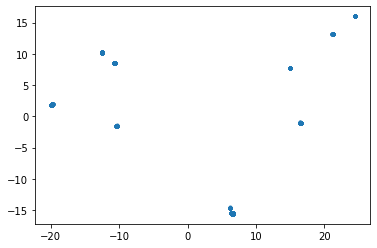

In [56]:
plt.plot(0.02*xy[:,0],0.02*xy[:,1], '.')#, label = labels)
#plt.xlim(-80, -75)
#plt.legend(plot_labels)

In [57]:
#I believe that this implies there are 7 distinct phases/structures/somethinglikethat for all 1680 configurations?

## prepare data set

In [58]:
#1680 from 1680 configs and 1462 from atom positions and energies?
df.shape

(1527, 1308)

In [59]:
#train_val_test split, deciding how big each category should be
valid_samples = int(round(.2*df.shape[0]))
test_samples = int(round(.1*df.shape[0]))
train_samples = df.shape[0]-test_samples-valid_samples

In [60]:
train_samples, valid_samples, test_samples

(1069, 305, 153)

In [61]:
#df.index.tolist()

In [62]:
# Set a random seed
RNG_SEED = 40
np.random.seed(seed=RNG_SEED)

#creating test/train/val split based on sizes above
#randomly add to val, then remove all from all_f if in val
#then randomly add to test from what is left, everything in test removed from all_f
#all thats left is testing data
#note this is just the indexes, being randomly assigned, can then go back to df using indices and create actual dfs
all_f = df.index.tolist().copy()
valid_data = np.random.choice(all_f,
                              size=valid_samples,
                              replace=False)


all_f = [ f for f in all_f if f not in valid_data]
test_data = np.random.choice(all_f,
                              size=test_samples,
                              replace=False)

all_f = [ f for f in all_f if f not in test_data]
train_data = all_f.copy()

In [63]:
#showing that some entries are missing from train when compared to all (indexes don't match)
train_data[10]

16

In [64]:
#df.isin(test_data)

In [65]:
#creating the train val test split and checking they are the correct size
cp_train = df.loc[train_data]
cp_train.shape

(1069, 1308)

In [66]:
cp_valid = df.loc[valid_data]
cp_valid.shape

(305, 1308)

In [67]:
cp_test = df.loc[test_data]
cp_test.shape

(153, 1308)

In [68]:
#sampling the split
cp_train_sample = cp_train.sample(n=1069, random_state=RNG_SEED)
cp_valid_sample = cp_valid.sample(n=305, random_state=RNG_SEED)
cp_test_sample = cp_test.sample(n=153, random_state=RNG_SEED)

len(cp_train_sample),len(cp_valid_sample),len(cp_test_sample)

(1069, 305, 153)

In [69]:
cp_train_sample

,0,1,2,3,4,5,6,7,8,9,...,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
1102,5.491322,-0.001825,0.007125,-0.001836,5.482594,-0.004654,0.052957,0.027958,41.047957,36.995080,...,0.114891,0.122884,0.065038,13.381445,10.036059,25.544243,0.117689,0.121985,0.224787,-628.12796
1395,5.474986,0.000000,0.000000,0.000000,5.469067,-0.005245,0.000000,0.024579,41.632840,37.666999,...,0.356664,0.381475,0.201903,41.540805,31.155526,79.298490,0.365348,0.378684,0.697821,-627.64478
744,5.472964,-0.004283,0.000011,-0.004271,5.469463,-0.003057,-0.000176,0.040229,41.643340,38.461266,...,0.356843,0.381666,0.202004,41.561603,31.171125,79.338193,0.365531,0.378874,0.698170,-627.60694
1397,5.477989,0.000000,0.000000,0.000000,5.471578,-0.005376,0.000000,0.023605,41.635771,37.666243,...,0.356660,0.381471,0.201900,41.540309,31.155154,79.297544,0.365344,0.378680,0.697812,-627.64553
1309,5.477751,0.000000,0.000000,0.000000,5.469267,-0.005217,0.000000,0.024587,41.601763,37.641302,...,0.356549,0.381353,0.201838,41.527461,31.145519,79.273019,0.365231,0.378562,0.697597,-627.61096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5.469535,-0.004377,-0.000002,-0.004362,5.470085,-0.003074,-0.000274,0.040111,41.679211,38.628292,...,0.356961,0.381793,0.202071,41.575431,31.181496,79.364590,0.365652,0.379000,0.698402,-627.63055
1456,5.473852,0.000000,0.000000,0.000000,5.469747,-0.005334,0.000000,0.024070,41.648997,37.703265,...,0.356745,0.381562,0.201949,41.550280,31.162632,79.316577,0.365431,0.378770,0.697980,-627.65666
229,5.504012,-0.000002,0.002344,0.000003,5.496479,-0.003236,0.017551,0.038415,40.774004,37.756907,...,2.185095,2.337102,1.236954,254.499001,190.873776,485.820791,2.238298,2.320001,4.275186,-628.43165
12,5.488200,-0.000024,0.006080,-0.000005,5.481738,-0.002972,0.044385,0.040637,41.433976,37.891729,...,1.943699,2.078913,1.100303,226.383502,169.787204,432.150270,1.991024,2.063702,3.802890,-626.78003


In [70]:
cp_train_sample.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306
1102,5.491322,-0.001825,0.007125,-0.001836,5.482594,-0.004654,0.052957,0.027958,41.047957,36.995080,...,0.099906,0.114891,0.122884,0.065038,13.381445,10.036059,25.544243,0.117689,0.121985,0.224787
1395,5.474986,0.000000,0.000000,0.000000,5.469067,-0.005245,0.000000,0.024579,41.632840,37.666999,...,0.310143,0.356664,0.381475,0.201903,41.540805,31.155526,79.298490,0.365348,0.378684,0.697821
744,5.472964,-0.004283,0.000011,-0.004271,5.469463,-0.003057,-0.000176,0.040229,41.643340,38.461266,...,0.310298,0.356843,0.381666,0.202004,41.561603,31.171125,79.338193,0.365531,0.378874,0.698170
1397,5.477989,0.000000,0.000000,0.000000,5.471578,-0.005376,0.000000,0.023605,41.635771,37.666243,...,0.310139,0.356660,0.381471,0.201900,41.540309,31.155154,79.297544,0.365344,0.378680,0.697812
1309,5.477751,0.000000,0.000000,0.000000,5.469267,-0.005217,0.000000,0.024587,41.601763,37.641302,...,0.310043,0.356549,0.381353,0.201838,41.527461,31.145519,79.273019,0.365231,0.378562,0.697597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5.469535,-0.004377,-0.000002,-0.004362,5.470085,-0.003074,-0.000274,0.040111,41.679211,38.628292,...,0.310401,0.356961,0.381793,0.202071,41.575431,31.181496,79.364590,0.365652,0.379000,0.698402
1456,5.473852,0.000000,0.000000,0.000000,5.469747,-0.005334,0.000000,0.024070,41.648997,37.703265,...,0.310213,0.356745,0.381562,0.201949,41.550280,31.162632,79.316577,0.365431,0.378770,0.697980
229,5.504012,-0.000002,0.002344,0.000003,5.496479,-0.003236,0.017551,0.038415,40.774004,37.756907,...,1.900083,2.185095,2.337102,1.236954,254.499001,190.873776,485.820791,2.238298,2.320001,4.275186
12,5.488200,-0.000024,0.006080,-0.000005,5.481738,-0.002972,0.044385,0.040637,41.433976,37.891729,...,1.690173,1.943699,2.078913,1.100303,226.383502,169.787204,432.150270,1.991024,2.063702,3.802890


In [71]:
#final variables with split made (no energy here)
y_train = cp_train_sample.iloc[:,1307]
y_valid = cp_valid_sample.iloc[:,1307]
y_test = cp_test_sample.iloc[:,1307]

In [72]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [73]:
#scaling and normalising the data
#.iloc[:,:-1] removes the energy values from the scaling
#energy is the target
X_train = scaler.fit_transform(cp_train_sample.iloc[:,:-1])
X_valid = scaler.transform(cp_valid_sample.iloc[:,:-1])
X_test  = scaler.transform(cp_test_sample.iloc[:,:-1])

In [74]:
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

## TRAINING

In [75]:
from time import time

### methods
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

### metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [76]:
nine_methods = [DummyRegressor,
                Ridge,
                KNeighborsRegressor,
                SVR,
                LinearSVR,
                AdaBoostRegressor,
                GradientBoostingRegressor,
                ExtraTreesRegressor,
                RandomForestRegressor]

In [77]:
nine_methods[1]

sklearn.linear_model._ridge.Ridge

In [78]:
### Measurements

def meas_method (act, pred):
    r2   = r2_score(act, pred)
    mae  = mean_absolute_error(act,pred)
    rmse = mean_squared_error(act,pred,squared=False)
    
    return r2, mae, rmse

In [79]:
###Evaluate
#intialises method, starts a timer, trains the models, timer finishes, time taken to train found
#accuracy on training validation set found

def evaluate (X_train, y_train, X_valid, y_valid, methods):
    
    fit_time   = []
    meas_train = []
    meas_valid = []
    pred_valid = []
    for m in methods:
    
        method =m()
        start = time()
        method.fit(X_train, y_train)
        end = time()
        delta = end-start
        print(m.__name__, '{:0.4f}'.format(delta)+'s')
        y_pred_t = method.predict(X_train)
        y_pred_v = method.predict(X_valid)
        
        fit_time.append(delta)
        pred_valid.append(y_pred_v)
        meas_train.append(meas_method(y_train,y_pred_t))
        meas_valid.append(meas_method(y_valid,y_pred_v))
    
    return meas_train, meas_valid, pred_valid, fit_time

In [80]:
e = evaluate(X_train,y_train,X_valid, y_valid,nine_methods)

DummyRegressor 0.0000s
Ridge 0.1710s
KNeighborsRegressor 0.0100s
SVR 0.1246s
LinearSVR 0.2253s
AdaBoostRegressor 11.6522s
GradientBoostingRegressor 69.3390s
ExtraTreesRegressor 60.2755s
RandomForestRegressor 134.7783s


In [81]:
###Define plot + regression y_pred
#function to make a plot of pred vs actual energy for each model
def plot_method (act, pred, method):
    xy_max = np.max([np.max(act), np.max(pred)])
    xy_min = np.min([np.min(act), np.min(pred)])
    polyfit = np.polyfit(act,pred,deg=1)
    reg_lsp = np.poly1d(polyfit)
    
    #print (reg_lsp, reg_lsp[1])
    
    line = [ i+.5 for i in range(int(xy_min)-1,int(xy_max)+1,2)]
    reg_lsm = reg_lsp(line)
    
    plt.plot(act,pred, 'o', ms=9, mec= 'k', mfc= 'silver', alpha=.4)
    plt.plot([xy_min,xy_max],[xy_min,xy_max],'k--', label='Target')
    plt.plot(line,reg_lsm,'r-', label ='Linear fit')#+str(reg_lsp))   
    
    #plt.
   # plt.xlim(xy_min-.2,xy_max+.2)
    plt.xlabel(r'Actual Energy',fontsize=16)
    plt.ylabel(r'Predicted Energy',fontsize=16)
    plt.legend(loc='upper left',fontsize=14)
    plt.title(str(method.__name__)+
              ', score='+ '{:0.4f}'.format(r2_score(act,pred))
              ,fontsize=20)
    #plt.show()
    return f'{reg_lsp[1]:0.6f}'

In [82]:
np.max([np.max(y_valid),np.max(e[2][2])])

-620.82145

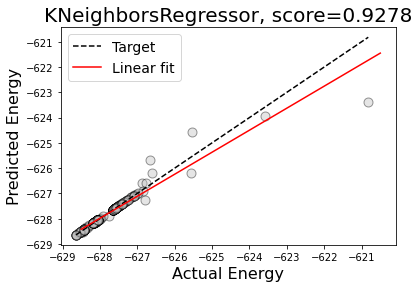

In [83]:
e_five = plot_method (y_valid,e[2][2],nine_methods[2])

In [84]:
e_five

'0.871222'

In [85]:
meas_train = e[0]
meas_valid = e[1]
time_fitti = e[3]

In [86]:
#creating mini datafames for all the different values
#then putting them all together to see how the models perform
df_time = pd.DataFrame(time_fitti, columns=['Fitting time'],
                       index=[m.__name__ for m in nine_methods])

df_train = pd.DataFrame(meas_train, 
                        columns=['r2_score_train', 'mae_train', 'rmse_train'],
                        index=[m.__name__ for m in nine_methods])

df_coef = pd.DataFrame(e_five, columns=['coef.lin_valid'],
                       index=[m.__name__ for m in nine_methods])

df_valid = pd.DataFrame(meas_valid, 
                   columns=['r2_score_valid', 'mae_valid', 'rmse_valid'], 
                   index=[m.__name__ for m in nine_methods])

df = pd.concat([df_time,df_train,df_valid,df_coef], axis=1)
df = df.sort_values('r2_score_valid')

In [87]:
df

,Fitting time,r2_score_train,mae_train,rmse_train,r2_score_valid,mae_valid,rmse_valid,coef.lin_valid
DummyRegressor,0.000000,0.000000,3.959696e-01,0.561331,-0.000495,0.426279,0.660956,0.871222
AdaBoostRegressor,11.652221,0.915991,1.459232e-01,0.162698,0.741438,0.176506,0.336006,0.871222
SVR,0.124615,0.792782,8.885948e-02,0.255525,0.753840,0.098854,0.327849,0.871222
ExtraTreesRegressor,60.275453,1.000000,2.654514e-07,0.000001,0.818470,0.037067,0.281540,0.871222
RandomForestRegressor,134.778263,0.978426,1.192110e-02,0.082449,0.822498,0.044955,0.278398,0.871222
GradientBoostingRegressor,69.339028,0.999524,6.325394e-03,0.012243,0.832247,0.044773,0.270645,0.871222
Ridge,0.170955,0.852677,5.774108e-02,0.215454,0.839241,0.060005,0.264943,0.871222
LinearSVR,0.225331,0.842002,6.406431e-02,0.223123,0.841895,0.071973,0.262747,0.871222
KNeighborsRegressor,0.010004,0.911607,1.995099e-02,0.166889,0.927786,0.024786,0.177572,0.871222


In [88]:
#just making it look nicer
def highlight_cols(x): 
      
    # copy df to new - original data is not changed 
    df = x.copy() 
      
    # select all values to green color 
    df.loc[:, :] = 'background-color: white and silver'
      
    # overwrite values grey color 
    df['r2_score_valid'] = 'background-color: lightgrey'
      
    # return color df 
    return df  
  
df_highlight = df.style.apply(highlight_cols, axis = None)

In [89]:
df_highlight                                   #rng=60

,Fitting time,r2_score_train,mae_train,rmse_train,r2_score_valid,mae_valid,rmse_valid,coef.lin_valid
DummyRegressor,0.000000,0.000000,0.395970,0.561331,-0.000495,0.426279,0.660956,0.871222
AdaBoostRegressor,11.652221,0.915991,0.145923,0.162698,0.741438,0.176506,0.336006,0.871222
SVR,0.124615,0.792782,0.088859,0.255525,0.753840,0.098854,0.327849,0.871222
ExtraTreesRegressor,60.275453,1.000000,0.000000,0.000001,0.818470,0.037067,0.281540,0.871222
RandomForestRegressor,134.778263,0.978426,0.011921,0.082449,0.822498,0.044955,0.278398,0.871222
GradientBoostingRegressor,69.339028,0.999524,0.006325,0.012243,0.832247,0.044773,0.270645,0.871222
Ridge,0.170955,0.852677,0.057741,0.215454,0.839241,0.060005,0.264943,0.871222
LinearSVR,0.225331,0.842002,0.064064,0.223123,0.841895,0.071973,0.262747,0.871222
KNeighborsRegressor,0.010004,0.911607,0.019951,0.166889,0.927786,0.024786,0.177572,0.871222


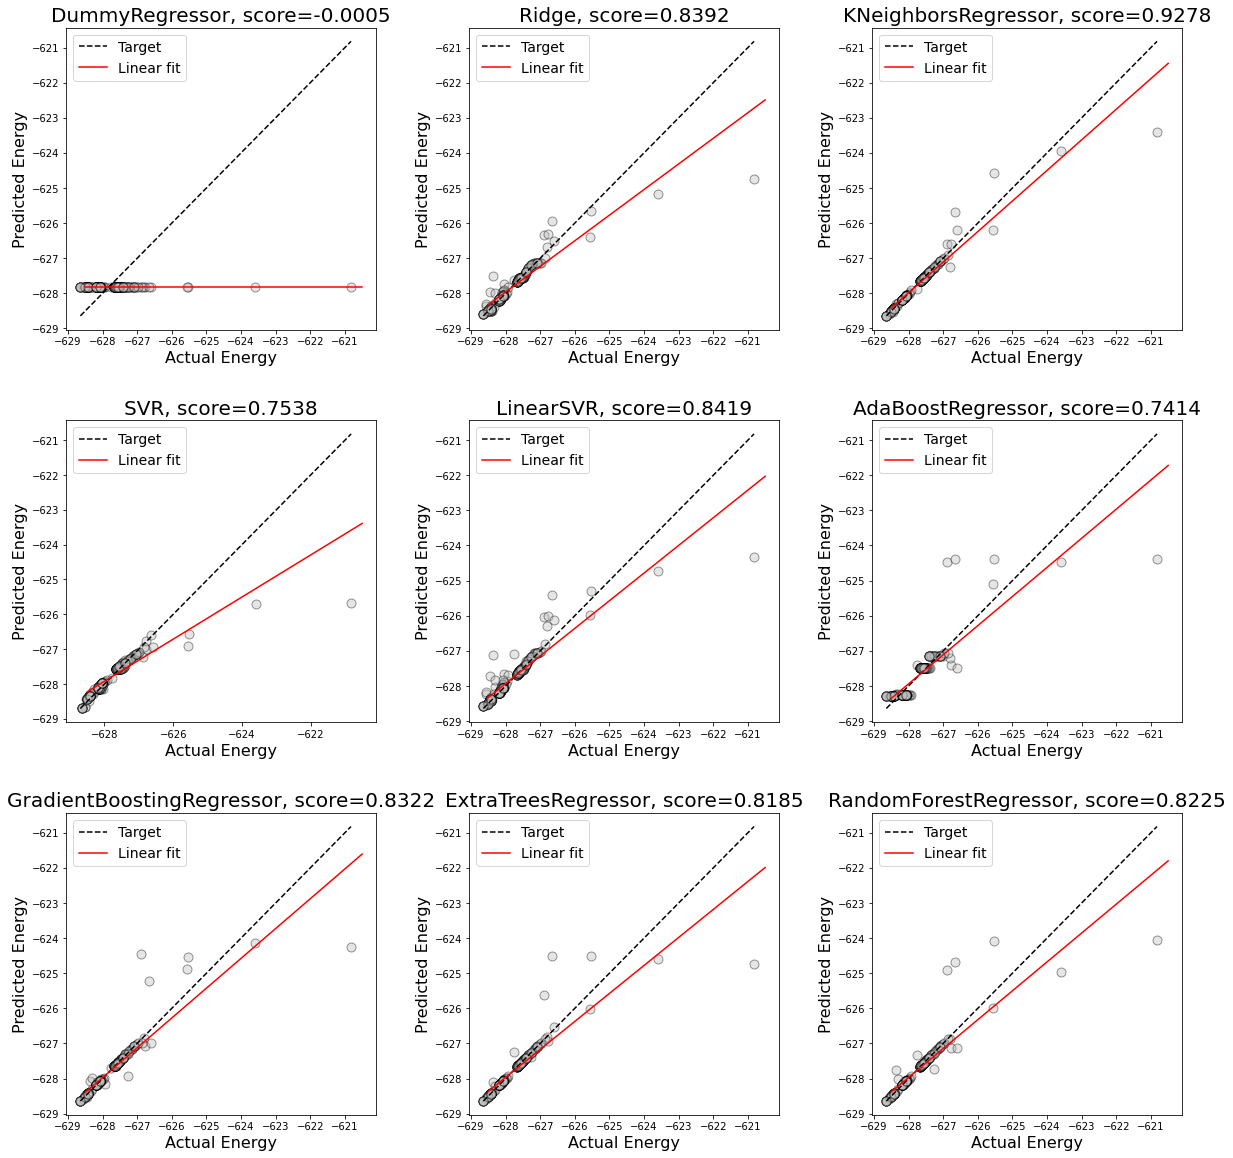

In [90]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=.3,hspace=.3)

e_five =[]

for j in range(0,9):
    plt.subplot(3,3,j+1)
    e_five.append(plot_method (y_valid,e[2][j],nine_methods[j]))
    
plt.savefig('nine_ML_methods.png')

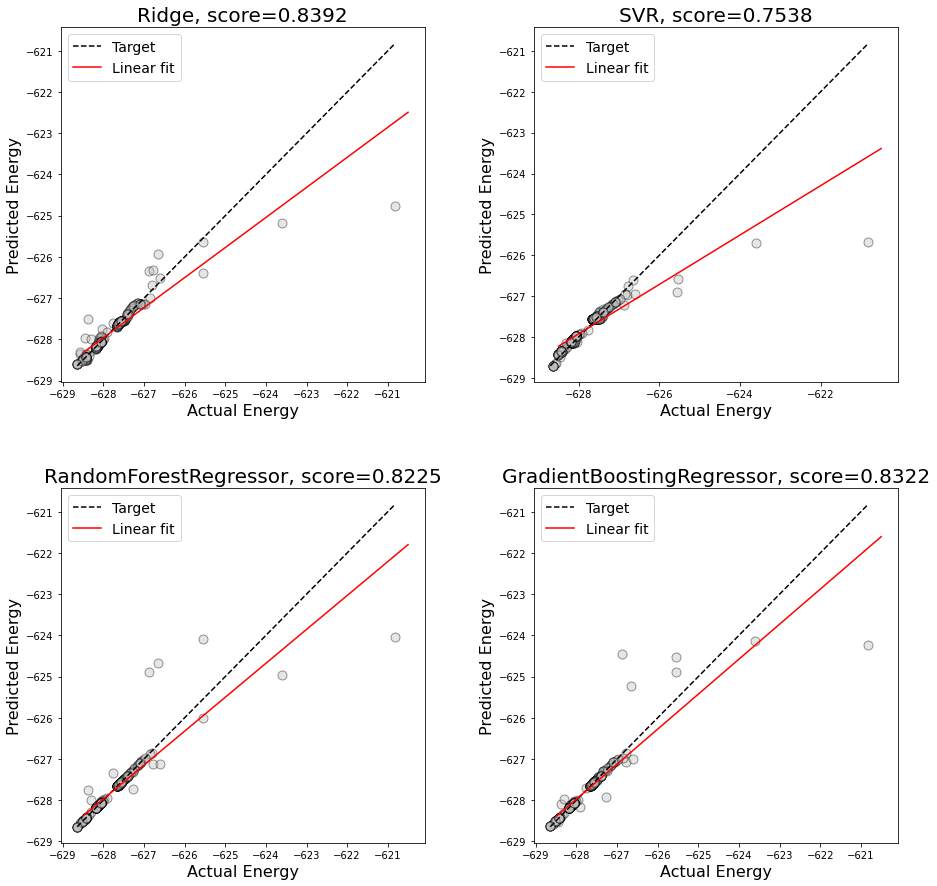

In [91]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=.3,hspace=.3)

e_five =[]

plt.subplot(2,2,1)
e_five.append(plot_method (y_valid,e[2][1],nine_methods[1]))

plt.subplot(2,2,2)
e_five.append(plot_method (y_valid,e[2][3],nine_methods[3]))

plt.subplot(2,2,3)
e_five.append(plot_method (y_valid,e[2][8],nine_methods[8]))

plt.subplot(2,2,4)
e_five.append(plot_method (y_valid,e[2][6],nine_methods[6]))
    
plt.savefig('four_ML_methods.png')

## Assingments for Orla

### 1- Add a new column with the label of the structure, for instance c11. And print with the plot with labels.


### 2- Train the model with configuration that are not in the validation set. For instance, Train with c1, c11, 12, c13, c14, c21, and use only c22 in validation set.

### 3- Work with cross-validation. PLUS: fix the "unbalacing" problem. For instance, 50 samples from each configurations.

# plot energy

In [98]:
energy_plot = []
labels = [1, 4, 7, 8, 10]#, 6 ,7, 8, 9, 10]
for i in labels:
    x = np.loadtxt('OSZICARS/energy'+str(i)+'.csv')
    energy_plot.append(x)
#energy_plot

In [99]:
order = [np.argsort(energy_plot[j][:,0]) for j in range(5)]


In [100]:
x = [] 
for j in range(5):
    x.append([energy_plot[j][i,0] for i in order[j]])

In [101]:
y = [] 
for j in range(5):
    y.append([energy_plot[j][i,1] for i in order[j]])

In [102]:
plot_labels = ['c1', 'c4', 'c7', 'c8', 'c10']#,'c6','c7', "c8", "c9", "c10"]

In [103]:
m5 = pd.read_csv("../../Bi6Ti5O18/ISAF-plots/BTFO-2_energy.csv")
m5.sort_values(by=['energy'])

FileNotFoundError: [Errno 2] No such file or directory: '../../Bi6Ti5O18/ISAF-plots/BTFO-2_energy.csv'

In [104]:
#threshold = m5.iloc[5,0]
threshold = -770.120

index = np.array(m5['config'])
delta = ((np.array(m5['energy'])-min(np.array(m5['energy'])))*1000/4)
delta1= ['+'+str("{:.2f}".format(i)) for i in delta]
c = np.array(['config. '+str(i) for i in np.array(m5['config'])])

NameError: name 'm5' is not defined

In [105]:
(np.array(m5['energy'])-min(np.array(m5['energy'])))

NameError: name 'm5' is not defined

In [106]:
fig = plt.figure()
fig.figsize=(6,6)
plt.subplots_adjust(wspace=.5,hspace=.5)
fig.patch.set_facecolor('white')
plt.plot(c,
         (np.array(m5['energy'])-min(np.array(m5['energy'])))*1000/4,
         'o')#, c="green")

plt.vlines(.5,.0,300,color="black",alpha=.7,linestyles='dashed')
plt.vlines(4.5,0,300,color="black",alpha=.7,linestyles='dashed')
#plt.hlines((threshold-min(np.array(m5['energy']))),0.0,10)

#plt.tick_params(
#    axis='y',          # changes apply to the x-axis
#    which='both', right = True,     # both major and minor ticks are affected
 #  # bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
 #   labelright=True)

#plt.ylim(-5,120)
#plt.tick_params(axis ='both')#,labelright=True)
plt.yticks(np.arange(0.0,310, step=50),size=14)
plt.ylabel("$\Delta$ E  (meV / f.u.)" ,size=16 )
plt.xticks(rotation=45,size=14)
plt.xlabel("",size=16)
plt.title('Bi$_6$Ti$_3$Fe$_{2}$O$_{18}$ Cation Distributions',size=16)

#plt.title("LDA+U functional",size=16)
#plt.savefig('../1-year-presentation/plots/m5-ldau.png',dpi=100,edgecolor='none')
plt.savefig('B6TFO.png', dpi=600, edgecolor='none', bbox_inches = 'tight')
#plt.show()

NameError: name 'm5' is not defined

<Figure size 432x288 with 0 Axes>

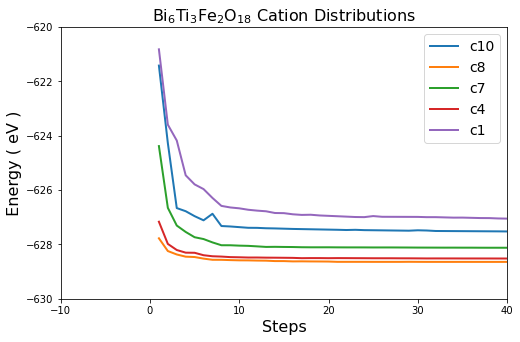

In [107]:
plt.figure(figsize=(8,5))
plt.subplots_adjust(wspace=.3,hspace=.3)

for i in range(5):
    n = 5-i-1
    plt.plot(x[n], y[n], '-', linewidth=2,
             markersize=20,label=labels)

plt.vlines(100,-770.5,-767,color="black",alpha=.7,linestyles='dashed')
plt.ylim(-630,-620)
plt.xlim(-10,40)
plt.legend(plot_labels[::-1],fontsize=14)
plt.ylabel(" Energy ( eV ) " ,size=16 )
plt.xlabel("Steps",size=16)
plt.title('Bi$_6$Ti$_3$Fe$_{2}$O$_{18}$ Cation Distributions',size=16)
plt.savefig('B6TFO-energy-steps.png', dpi=600, edgecolor='none', bbox_inches = 'tight')